## **Latihan Text Mining**

### **Gunakan dataset spam_or_not_spam**


* Preprocess data, gunakan lemmatization dan TF-IDF sebagai bagian dari preprocessing.  
* Lakukan eksplorasi data dengan menampilkan:
    - words frequency
    - wordcloud  
    - sentences length dari spam vs not spam.     
* Untuk text classification, coba gunakan model logistic regression.
* Lakukanlah tuning pada model tersebut, lalu bandingkan hasil sebelum dan sesudah tuning.

## **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

## **Load dataset**

In [ ]:
df = pd.read_csv('spam_or_not_spam.csv')
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [ ]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

In [ ]:
# Change email dtype to string
df['email'] = df['email'].astype(str)

## **Text Preprocessing 1**

**Methods:**

1. Converting to lower case
2. Contraction
3. Remove or convert number into text
4. Remove punctuation
5. Remove white spaces
6. Remove stopwords and particular words

**1. Converting to lower case**

Jadi huruf kecil semua

In [ ]:
def to_lower(text):
    return text.lower()

**2. Contraction**

Jadi bukan singkatan

In [ ]:
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}


def expand_contractions(text, contractions_dict):

    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    # pada text/df['email'], ketika ada pattern seperti pada "contractions_pattern", maka akan kita ganti dengan "expanded_match"
    expanded_text = contractions_pattern.sub(expand_match, text)

    # pada expanded text, ketika ada kutip satu "'", maka kita hapus atau kita ganti dengan string kosong ""
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# agar nanti hanya memasukkan 1 argumen saja
def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [ ]:
# keys pada contractions_dict dijadikan sebagai pattern
contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

contractions_pattern

re.compile(r"(ain't|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so've|so's|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.IGNORECASE|re.DOTALL|re.UNICODE)

In [ ]:
# IGNORECASE: Spam will match 'Spam', 'spam', 'spAM', or 'ſpam'
# DOTALL: Makes the '.' special character match any character at all, including a newline; without this flag, '.' will match anything except a newline.
# |: or

In [ ]:
df['email'][0]

' date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER 

In [ ]:
contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]

    expanded_contraction = contractions_dict.get(match) \
        if contractions_dict.get(match) \
        else contractions_dict.get(match.lower())
    expanded_contraction = expanded_contraction
    return expanded_contraction

expanded_text = contractions_pattern.sub(expand_match, df['email'].apply(to_lower)[0])
expanded_text = re.sub("'", "", expanded_text)
expanded_text

' date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number hit comes from obviously the version of nmh i m using is delta pick version pick nmh number number number compiled on url at sun mar number number 

**3. Remove or convert number into text**

Hapus angka dari text

In [ ]:
def remove_numbers(text):
    output = ''.join(x for x in text if not x.isdigit())
    return output

**4. Remove punctuation**

Hapus punctuation/tanda baca

* https://docs.python.org/3/library/string.html

In [ ]:
from string import punctuation

In [ ]:
def remove_punct(text):
    return ''.join(x for x in text if x not in punctuation)

**5. Remove white spaces**

Hapus double space

In [ ]:
def to_strip(text):
    return " ".join(text.split())

**6. Remove stop words and particular words**

Hapus stopwords (kata-kata yang tidak bernilai)

* https://www.nltk.org/book/ch02.html


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([x for x in nltk.word_tokenize(sentence) if not x in stop_words])

## **Combine preprocessing methods**

In [ ]:
df['email_prep1'] = df['email'].apply(to_lower)
df['email_prep2'] = df['email_prep1'].apply(main_contraction)
df['email_prep3'] = df['email_prep2'].apply(remove_numbers)
df['email_prep4'] = df['email_prep3'].apply(remove_punct)
df['email_prep5'] = df['email_prep4'].apply(to_strip)
df['email_prep6'] = df['email_prep5'].apply(remove_stopwords)

df

,email,label,email_prep1,email_prep2,email_prep3,email_prep4,email_prep5,email_prep6
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numbe...,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin posted tassos papadopoulos greek sculpt...
2,man threatens explosion in moscow thursday aug...,0,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion moscow thursday august...
3,klez the virus that won t die already the most...,0,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez virus die already prolific virus ever kle...
4,in adding cream to spaghetti carbonara which ...,0,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which h...,adding cream spaghetti carbonara effect pasta ...
...,...,...,...,...,...,...,...,...
2995,abc s good morning america ranks it the NUMBE...,1,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the number...,abc good morning america ranks number christma...
2996,hyperlink hyperlink hyperlink let mortgage le...,1,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage len...,hyperlink hyperlink hyperlink let mortgage len...
2997,thank you for shopping with us gifts for all ...,1,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all o...,thank shopping us gifts occasions free gift nu...
2998,the famous ebay marketing e course learn to s...,1,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to se...,famous ebay marketing e course learn sell comp...


## **Text preprocessing 2**

### **Lemmatization**

* https://www.nltk.org/api/nltk.stem.wordnet.html

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# df['email_prep6'][0]

In [ ]:
# nltk.sent_tokenize(df['email_prep6'][0])

In [ ]:
# nltk.word_tokenize(df['email_prep6'][0])

In [ ]:
# WordNetLemmatizer().lemmatize('gifts')

In [ ]:
# melaukan lemmatize pada suatu kata
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_3(text):

    word_lemma = []

    # 1 email dipecah menjadi banyak sentence
    for sent in nltk.sent_tokenize(text):

        # 1 sentence dipecah menjadi banyak word
        for word in nltk.word_tokenize(sent):
            lemma_word = wordnet_lemmatizer.lemmatize(word)
            word_lemma.append(lemma_word)

    return ' '.join(word_lemma)


df['email_prep6'].apply(lemmatize_3)

0       date wed number aug number number number numbe...
1       martin posted tasso papadopoulos greek sculpto...
2       man threatens explosion moscow thursday august...
3       klez virus die already prolific virus ever kle...
4       adding cream spaghetti carbonara effect pasta ...
                              ...                        
2995    abc good morning america rank number christmas...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping u gift occasion free gift numbe...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional 子 件 number世 o最有效的宣 鞣...
Name: email_prep6, Length: 3000, dtype: object

In [ ]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

**Apply lemmatization**

In [ ]:
df['email_prep_lemma'] = df['email_prep6'].apply(lemmatize)
df['email_prep_lemma']

0       date wed number aug number number number numbe...
1       martin posted tasso papadopoulos greek sculpto...
2       man threatens explosion moscow thursday august...
3       klez virus die already prolific virus ever kle...
4       adding cream spaghetti carbonara effect pasta ...
                              ...                        
2995    abc good morning america rank number christmas...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping u gift occasion free gift numbe...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional 子 件 number世 o最有效的宣 鞣...
Name: email_prep_lemma, Length: 3000, dtype: object

## **Text exploration**

### **Words frequency**

In [ ]:
def mydict(check):

    check = check.str.extractall('([a-zA_Z]+)')     # extract tiap kata menjadi sebuah dataframe. 1 kata per row
    check.columns = ['check']                       # ubah nama kolomnya
    b = check.reset_index(drop=True)                # reset index
    check = b['check'].value_counts()               # menghitung kata yang sama

    # ditampilkan dalam bentuk dataframe
    mydict = {'word':check.index,'freq':check.values}
    mydict = pd.DataFrame(mydict)
    mydict.index = mydict['word']
    mydict.drop('word', axis = 1, inplace = True)
    mydict.sort_values('freq', ascending=False, inplace=True)

    return mydict

In [ ]:
df['email_prep_lemma'].str.extractall('([a-zA_Z]+)')

0
     match        
0    0        date
     1         wed
     2      number
     3         aug
     4      number
...            ...
2999 237         w
     238         l
     239         r
     240         x
     241         g

[418455 rows x 1 columns]

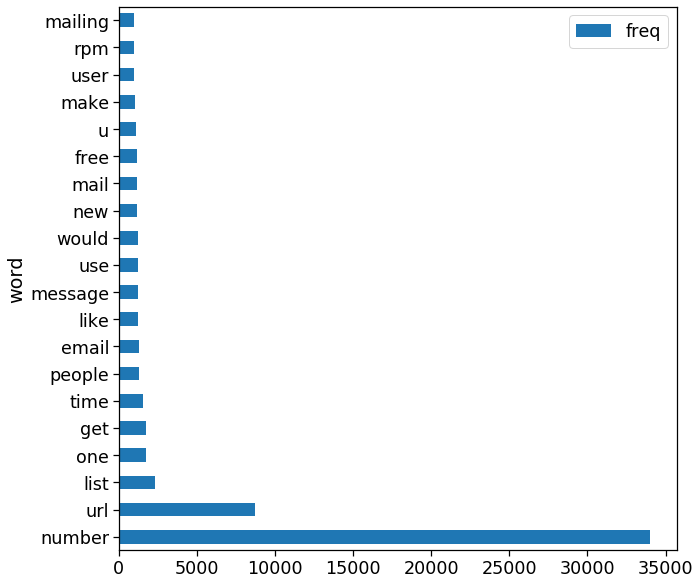

In [ ]:
mydict_unclean = mydict(df['email_prep_lemma'])

sns.set_context(context = 'notebook', font_scale = 1.6)

# barplot horizontal: jumlah kata dalam seluruh dataset ini. 20 kata terbanyak.
mydict_unclean[:20].plot(kind = 'barh', figsize = (10, 10));

- Kata yang paling banyak muncul dalam corpus/dataset ini adalah kata 'number', 'url', 'list', 'one', dan seterusnya.
- Kata-kata yang sering muncul dan dianggap tidak bernilai, bisa kita hapus atau dimasukkan dalam stopwords di tahap preprocessing

### **Word cloud**

* http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis('off')

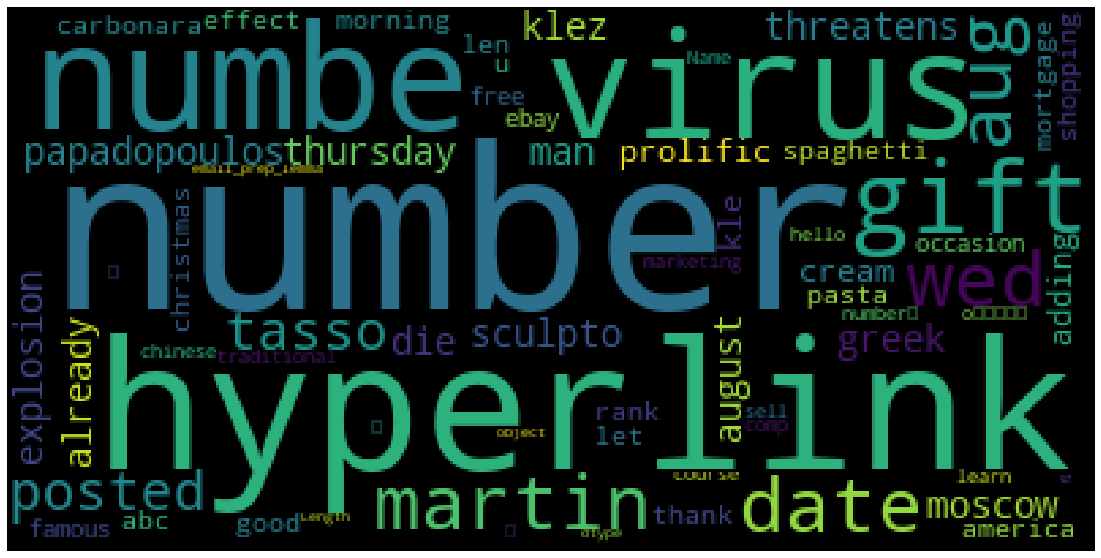

In [ ]:
word_cloud = WordCloud().generate(str(df['email_prep_lemma']))
plot_cloud(word_cloud)

**Word cloud of spam**

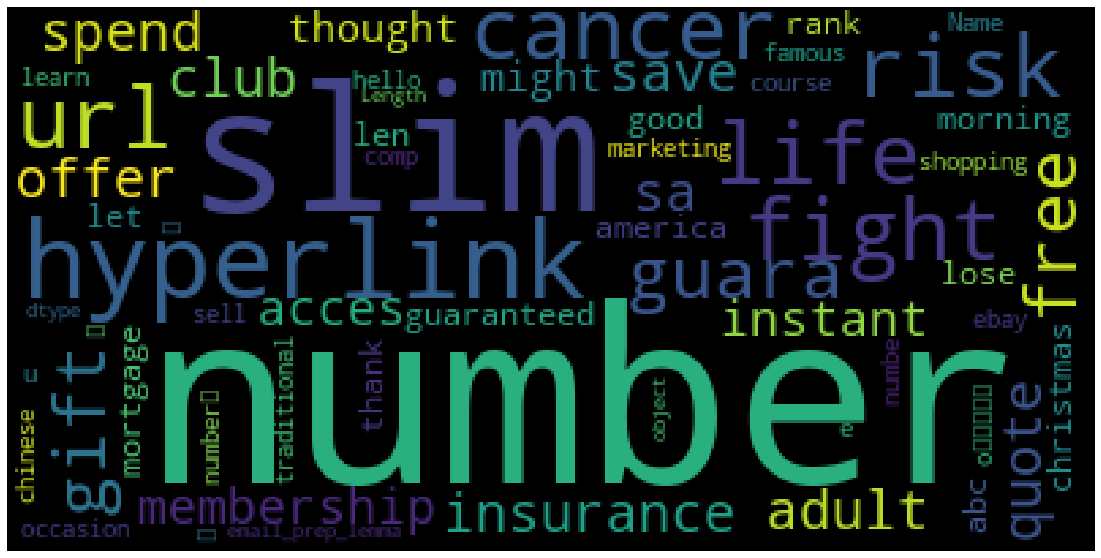

In [ ]:
word_cloud_spam = WordCloud().generate(str(df[df['label'] == 1]['email_prep_lemma']))
plot_cloud(word_cloud_spam)

**Word cloud of not-spam**

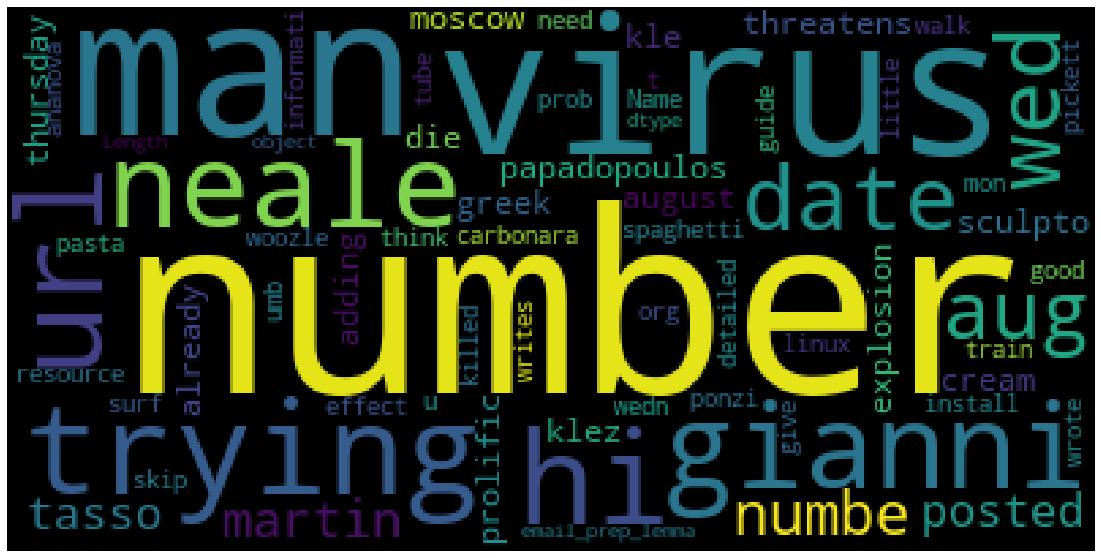

In [ ]:
word_cloud_ham = WordCloud().generate(str(df[df['label'] == 0]['email_prep_lemma']))
plot_cloud(word_cloud_ham)

Pada email spam banyak muncul:
- slim
- hyperlink
- cancer
- risk

Pada email non-spam banyak muncul:
- man
- virus
- trying
- hi

### **Length of sentences**

In [ ]:
df['length'] = df['email'].apply(len)

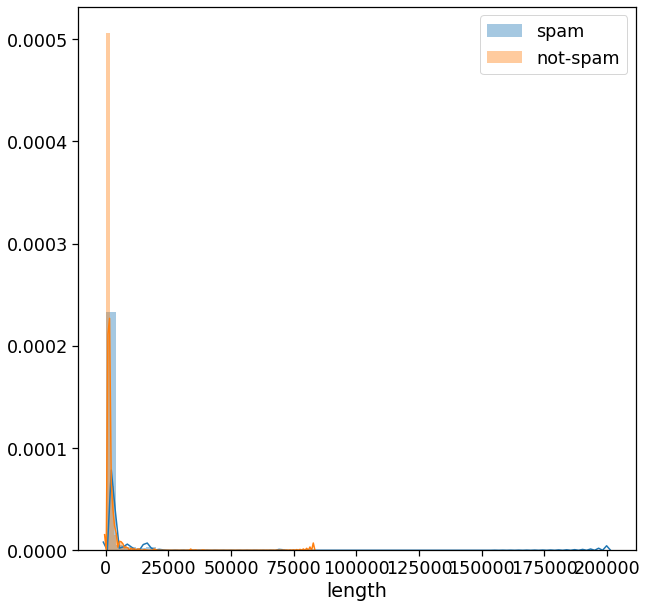

In [ ]:
plt.figure(figsize = (10, 10))

df_spam = df[df['label'] == 1]
df_ham = df[df['label'] == 0]

sns.distplot(df_spam['length'])
sns.distplot(df_ham['length'])

plt.legend(['spam', 'not-spam']);

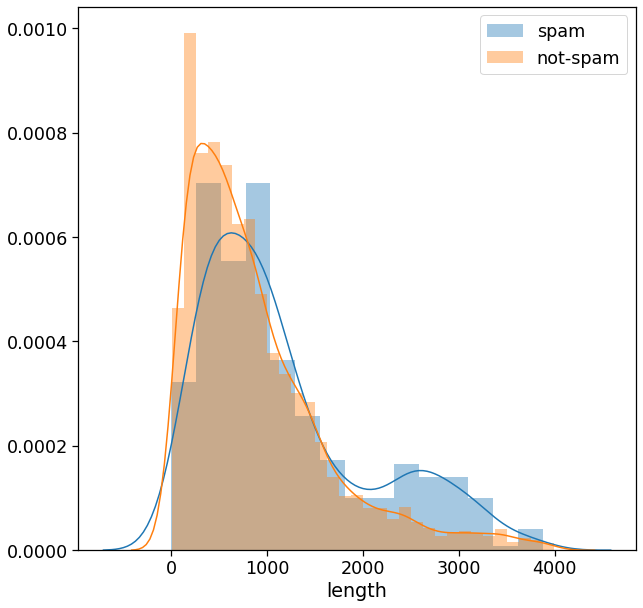

In [ ]:
plt.figure(figsize = (10, 10))

df_email = df[df['length'] < 4000]
df_spam = df_email[df_email['label'] == 1]
df_ham = df_email[df_email['label'] == 0]

sns.distplot(df_spam['length'])
sns.distplot(df_ham['length'])

plt.legend(['spam', 'not-spam']);

### **Interpretasi histogram**

- Panjang email spam dan not-spam secara umum sama
- Pada panjang email sekitar 2300-3300 kata, email spam lebih banyak dari pada email not-spam

## **DTM IDF**

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### **Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['email_prep_lemma']
y = df['label']

In [ ]:
# train test split
text_train, text_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

**Vectorizer**

- Jumlah kolom adalah jumlah seluruh kata (unique) dalam dataset
- Tiap kata pada 1 row (1 email) akan diberi bobot sesuai dengan berapa kali dia muncul dalam email itu sendiri dan muncul pada email lainnya.

In [ ]:
# Document Term Matrix dengan TF-IDF
vect = TfidfVectorizer().fit(text_train)

X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [ ]:
# nama kolom
vect.get_feature_names()

['aa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplfnumberfhxl',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacnumbermmvznumbercjnumberzld',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacunumberwlcunumberwmnumberdlo',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabcnumberfudnumberhgknumberxt',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplfnumberfhxlnumbermh',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaafcvwyfk',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplfnumberfhxlnumbermhyv',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacnlzcunnumberljnumberfetbkvts',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaknumberesw',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaknumberrgunumberjkdaljhgyaxwxhxsvbunumber',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaagvsapweyx

In [ ]:
X_train

<2400x28321 sparse matrix of type '<class 'numpy.float64'>'
	with 206058 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<600x28321 sparse matrix of type '<class 'numpy.float64'>'
	with 45477 stored elements in Compressed Sparse Row format>

## **Text classification**

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report, accuracy_score

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

#### **Choose benchmark model**

In [ ]:
# Define models
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
logreg = LogisticRegression(random_state=0)
rf = RandomForestClassifier(random_state=0)

models = [knn, tree, logreg, rf]
score = []
nilai_mean = []
nilai_std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(i, X_train, y_train, cv=skfold, scoring='f1', error_score='raise')
    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())
    print(model_cv, i)

[0.87804878 0.83832335 0.74489796 0.71171171 0.74757282] KNeighborsClassifier()
[0.84848485 0.86060606 0.84810127 0.85714286 0.83832335] DecisionTreeClassifier(random_state=0)
[0.80597015 0.79699248 0.78787879 0.82352941 0.87323944] LogisticRegression(random_state=0)
[0.88275862 0.93333333 0.91390728 0.93421053 0.93333333] RandomForestClassifier(random_state=0)


In [ ]:
pd.DataFrame({
    'model':['knn', 'tree', 'logreg', 'rf'],
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,knn,0.784111,0.063052
1,tree,0.850532,0.007802
2,logreg,0.817522,0.030246
3,rf,0.919509,0.019901


- Berdasarkan cross validation, model terbaik adalah Random Forest dengan f1-score 0.91
- Percobaan hyperparameter tuning pada Random Forest dengan menggunakan randomized search dengan n_iter=10 belum menemukan hasil yang lebih baik.
- Kita bisa coba dengan menaikkan jumlah n_iter atau coba menggunakan grid search untuk mendapatkan hasil yang lebih baik, namun akan memakan waktu yang cukup lama untuk fitting-nya.
- Jadi selanjutnya kita akan coba gunakan Logistic Regression.

## **Model performance on test set**

In [ ]:
model_logreg = LogisticRegression(random_state=0)

model_logreg.fit(X_train, y_train)

y_pred = model_logreg.predict(X_test)

f1_model = f1_score(y_test, y_pred)
f1_model

0.8700564971751412

## **Hyperparameter tuning**

#### **Logistic Regression**

In [ ]:
# hyperparam space
hyperparam_space = {
    'model__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

# Define vectorizer
vect_tfidf = TfidfVectorizer()

# skfold
skfold = StratifiedKFold(n_splits=5)

# Define model
model = LogisticRegression(random_state=0)

# Pipeline
pipe = Pipeline([
    ('prep', vect_tfidf),
    ('model', model)
])

# Tuning
random_search = RandomizedSearchCV(
    pipe,
    param_distributions = hyperparam_space,
    cv = skfold,
    scoring= 'f1',
    n_jobs= -1,
    random_state=0
)

In [ ]:
random_search.fit(text_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep', TfidfVectorizer()),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_jobs=-1,
                   param_distributions={'model__C': [1000, 100, 10, 1, 0.1,
                                                     0.01, 0.001, 0.0001]},
                   random_state=0, scoring='f1')

In [ ]:
print('Best score logreg:', random_search.best_score_)
print('Best params logreg:', random_search.best_params_)

Best score logreg: 0.9654072285801343
Best params logreg: {'model__C': 1000}


In [ ]:
pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.261002,0.280771,0.265197,0.032790,1000,{'model__C': 1000},0.954839,0.961538,0.980892,0.967742,0.962025,0.965407,0.008756,1
1,3.038405,0.230705,0.343799,0.080098,100,{'model__C': 100},0.940397,0.961039,0.980892,0.954248,0.954839,0.958283,0.013167,2
2,2.424206,0.355254,0.269996,0.033273,10,{'model__C': 10},0.926174,0.961039,0.967742,0.940397,0.934211,0.945913,0.015889,3
3,2.137806,0.202434,0.269194,0.059151,1,{'model__C': 1},0.832117,0.865248,0.796992,0.873239,0.873239,0.848167,0.029751,4
4,1.615000,0.071802,0.294203,0.040988,0.1,{'model__C': 0.1},0.095238,0.095238,0.117647,0.139535,0.117647,0.113061,0.016603,5
5,1.630803,0.043437,0.289796,0.026352,0.01,{'model__C': 0.01},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
6,1.402802,0.127797,0.269000,0.062693,0.001,{'model__C': 0.001},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
7,1.531205,0.032693,0.298998,0.029168,0.0001,{'model__C': 0.0001},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6


In [ ]:
# model dengan hyperparameter tuning
model_tuning = random_search.best_estimator_

# fitting
model_tuning.fit(text_train, y_train)

# predict
y_pred_model_tuning = model_tuning.predict(text_test)

# f1 score
f1_model_tuning = f1_score(y_test, y_pred_model_tuning)
f1_model_tuning

0.9528795811518325

In [ ]:
score_list = [f1_model_tuning]
models = ['Logistic Regression']

score_after_tuning = pd.DataFrame({
    'Model': models,
    'F1 score': score_list
})

### **Test Score Comparison**

In [ ]:
# before tuning
f1_model

0.8700564971751412

In [ ]:
# after tuning
f1_model_tuning

0.9528795811518325

In [ ]:
print('Before tuning\n', classification_report(y_test, y_pred))
print('After tuning\n', classification_report(y_test, y_pred_model_tuning))

Before tuning
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       500
           1       1.00      0.77      0.87       100

    accuracy                           0.96       600
   macro avg       0.98      0.89      0.92       600
weighted avg       0.96      0.96      0.96       600

After tuning
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       1.00      0.91      0.95       100

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.98      0.98       600



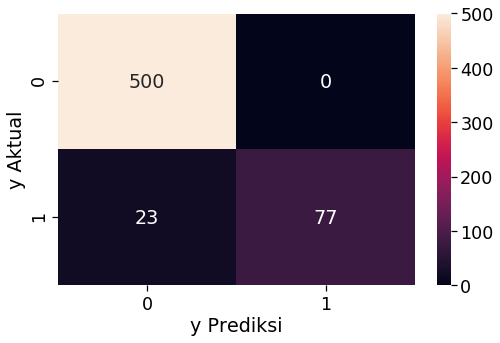

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

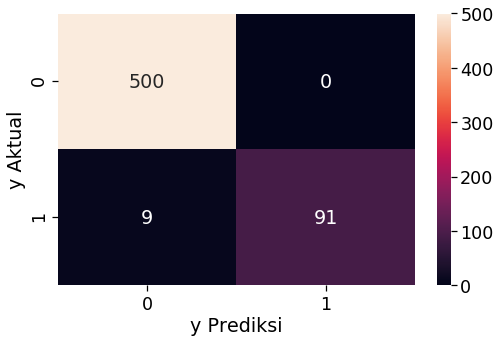

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_model_tuning), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

## **Summary**

- Dalam modeling klasifikasi email spam ini kita menggunakan Logistic Regression.
- Dalam kasus klasifikasi email spam, kita bisa menggunakan metric Precision karena kita fokus untuk melakukan minimalisasi pada False Positive (email bukan spam yang diprediksi sebagai email spam).
- Jika menggunakan Precision, benchmark model sudah memiliki Precision 1.0 dan setelah dilakukan hyperparameter tuning pun nilai Precision tetap 1.0 alias prediksinya sempurna.
- Kita harus berhati-hati dengan model yang performanya terlalu bagus karena ada kemungkinan terjadi overfitting.   
- Hyperparameter tuning berhasil meningkatkan performa model dalam memprediksi apakah suatu email termasuk spam atau bukan, dilihat dari nilai f1 score yang asalnya 0.87 menjadi 0.95 setelah tuning.
- Improvement terjadi dari False Negative yang awalnya berjumlah 23 email, berkurang menjadi 9 email setelah tuning.


## **Latihan Recommendation System (Content Based Filtering)**<br>
### **Gunakan dataset anime**

### **Content based filtering for one user**

- Drop missing values
- Vectorize untuk mendapatkan tiap nilai genre untuk tiap anime (item-feature matrix with rating)
- Pilih 3 anime yang disukai user (bebas)
- Buat user feature vector
- Cari 10 rekomendasi anime untuk user

# **Content Based Filtering for Multiple Users**<br>
**Rekomendasikan masing-masing 10 anime untuk setiap user**

Buatlah:
- Item feature: anime_id, name, genre
- Buat user-item rating matrix di mana isinya adalah 4 user dan 4 anime yang sudah diberi rating oleh keempat user tersebut (buat secara random saja)
- Buat item-feature matrix untuk semua anime dan filter-lah untuk 4 anime yang sudah diberi rating
- Buat user feature matrix dan user feature vector-nya
- Buat rekomendasi untuk anime yang belum ditonton
- Sort dan filtering 10 rekomendasi anime untuk tiap user